In [2]:
import numpy as np # library for data structures, vectors, matrices and mathematical functions
import matplotlib.pyplot as plt                   # library for plotting and visual representation
import matplotlib.transforms as transform                   # library for plotting and visual representation
from matplotlib import rcParams                   # module handling generic plot parameters
from matplotlib.ticker import (FormatStrFormatter)# module for figure axis formatting
import pandas as pd                               # data administration, here used for data import
from scipy.optimize import curve_fit              # fitting algorithm from the scipy package
from IPython.display import display as dy, Markdown as md, Latex as Lx, Image as Im, HTML as hm # displaying LaTeX code in code cells
import os
import re
from scipy.signal import find_peaks

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 15,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'figure.figsize': (10,6),
                    })

plt.rcParams['axes.facecolor'] = 'black' 
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['xtick.labelcolor'] = 'white'
plt.rcParams['ytick.labelcolor'] = 'white'
plt.rcParams['legend.labelcolor'] = 'white'
plt.rcParams['grid.color'] = '#707070'
plt.rcParams['axes.titlepad'] = 20
legendfontsize=12

ip = get_ipython()
ibe = ip.configurables[-1]
ibe.figure_formats = { 'pdf', 'png'}

#  O04e Focal Length and Principal Planes of a Lens System

Group #13

NG Kuok Fung | #3797903 

Edgar Harutyunyan | #3775171

**Overview of Tasks**

1. Determine the focal length and the position of the principal planes of a system consisting of two thin converging lenses for a given lens distance.
</br>

2. Determine the focal lengths of both lenses using Bessel’s method. Measure the distance between the lenses and calculate the focal length of the lens system.
</br>

3. Draw a diagram to scale showing the positions of the principal planes and the focal points of the lens system; construct an image corresponding to one measured object distances from task 1. Determine the value of the linear magnification from the construction and compare to the experimental value. 

In [1]:
# GLOBALS
#data_dir='./data/'
#L =2*1e-3 

## Task 1

***Task Definition*** 

Determine the focal length of the system of 2 lenses $f_{sys}$ and the position of the principal planes $h$ and $h'$ of a system consisting of two thin converging lenses for a given lens distance.

***Theoretical Basis*** 

$$g' = g + h = f_{sys} \left(1 + \frac{1}{\gamma} \right) + h$$

$$b' = b + h' = f_{sys} (1 + \gamma) + h'$$

- b : Image distance 
- g : Object distance

***Procedure*** 

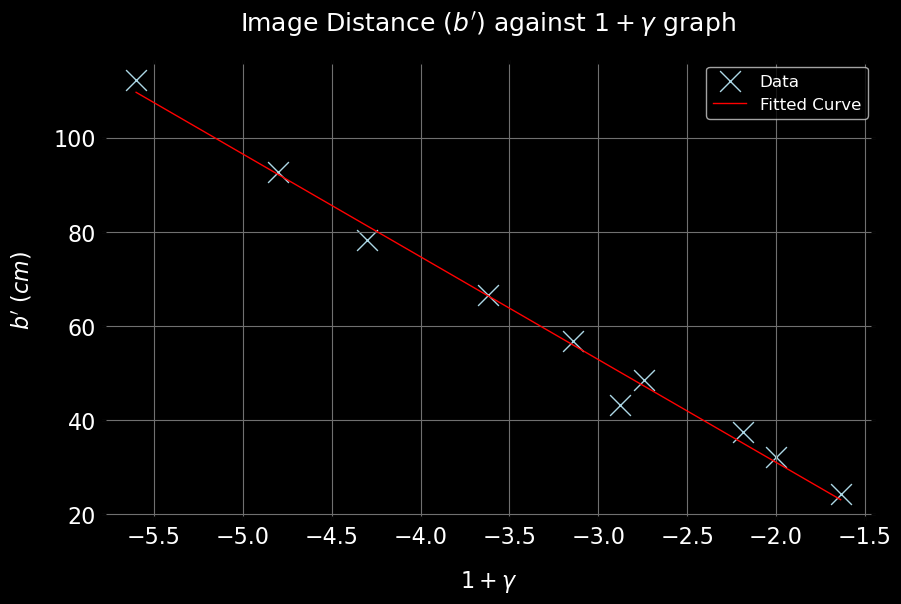

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

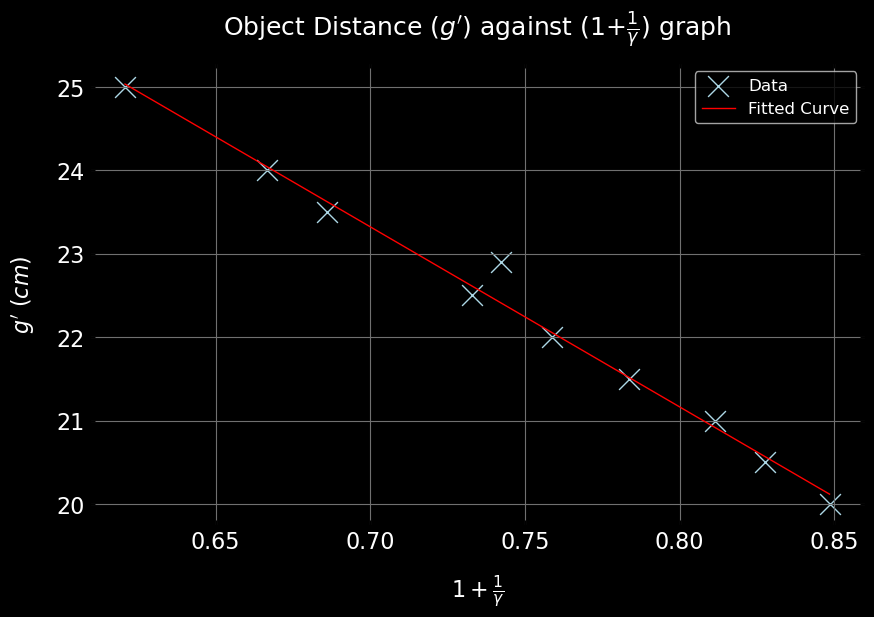

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [16]:
# Load the Excel file
file_path = "./data/O04e.xlsx"
df = pd.read_excel(file_path)

# Extract and rename columns
df1 = df.iloc[0:10, [4, 12]].rename(columns={df.columns[4]: 'y1', df.columns[12]: 'x1'})
df2 = df.iloc[0:10, [5, 13]].rename(columns={df.columns[5]: 'y2', df.columns[13]: 'x2'})
df1['y1'] = df1['y1']*1e-1 # mm -> cm
df2['y2'] = df2['y2']*1e-1 # mm -> cm
# Define a function to create scatter plots with non-linear regression and label renaming
def fit_and_plot(df, x_col, y_col, xlabel, ylabel, title, fit_func):
    plt.scatter(df[x_col], df[y_col], color='#ADD8E6',marker='x', label=r'Data')
    #plt.scatter(df[x_col], df[y_col], color=color,marker='x', label=f'{ylabel[:-4]} vs {xlabel}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    
    # Perform non-linear regression using curve_fit
    x = df[x_col].values
    y = df[y_col].values
    params, cov_mat = curve_fit(fit_func, x, y)
    
    # Plot the fitted curve
    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = fit_func(x_fit, *params)
    plt.plot(x_fit, y_fit, color='red', label='Fitted Curve')
    plt.legend()
    plt.show()
    return [params, cov_mat]

# Define a linear function for curve fitting
def f(x, f_arg, h_arg):
    return f_arg*x+h_arg

## Plot b against x2 with non-linear regression and custom labels
fit_1 = fit_and_plot(df2, 'x2', 'y2', r'$1+\gamma$', r"$b'$ ($cm$)", "Image Distance ($b'$) against $1+\gamma$ graph", f)
dy(Lx(r"$Figure\, 1.1$: Image Distance ($b'$) against $1+\gamma$ fit."))
dy(Lx(r"$$|f_{sys}| = (%.2f \pm %.3f) ~cm$$" % (np.abs(fit_1[0][0]), np.sqrt(fit_1[1][0][0]))))
dy(Lx(r"$$h' = (%.2f \pm %.3f) ~cm$$" % (fit_1[0][1], np.sqrt(fit_1[1][1][1]))))
## Plot g against x1 with non-linear regression and custom labels
fit_2 = fit_and_plot(df1, 'x1', 'y1', r'$1+\frac{1}{\gamma}$', "$g'$ ($cm$)", r"Object Distance ($g'$) against (1+$\frac{1}{\gamma}$) graph", f)
dy(Lx(r"$Figure\, 1.2$: Object Distance ($g'$) against (1+$\frac{1}{\gamma}$) graph fit."))
dy(Lx(r"$$|f_{sys}| = (%.2f \pm %.3f) ~cm$$" % (np.abs(fit_2[0][0]), np.sqrt(fit_2[1][0][0]))))
dy(Lx(r"$$h = (%.2f \pm %.3f) ~cm$$" % (fit_2[0][1], np.sqrt(fit_2[1][1][1]))))

As $h' = b' - b$ is negative then $b' < b$. Hence, H' principal axes lies on the left sight of A pointer.

As $h = g' - g$ is positive, then $g' > g$. Hence, H principal axes lies on the left sight of the A pointer.

## Task 2

***Task Definition*** 

Determine the focal lengths of both lenses $f_1$ and $f_2$ using Bessel’s method. Measure the distance ($a$) between the lenses and calculate the focal length of the lens system.

***Theoretial Basis*** 

***Procedure*** 

1. Distance $s$ between the object $G$ and the screen $B$ is fixed. A lens from task 1, with focal length $f_1$, is then placed in-between them **Fig 1.2**.
<br>

2. The lens is moved until a sharp image forms on the screen, with object and image distances $g_1$ and $b_1$ respectively.
<br>

3. The lens is moved again to form another sharp image, and the new distances $g_2$ and $b_2$ are recorded.
</br> 

4. The distance $a$ between the two different lens positions is calculated using Eq [2.1](#mjx-eqn-eq2.1), and $f_1$ is determined using Eq [2.2](#mjx-eqn-eq2.2).
</br>

5. The previous steps were repeated for 5 different values of $s$ to determine the average focal length $f_{1avg}$.
</br> 

6. This procedure is repeated using the other lens from task 1 to determine focal length $f_2$. 
</br>

7. The focal length of the double lens system may be determined using Eq [2.3](#mjx-eqn-eq2.2).